In [168]:
import torch
from torch import nn
from torch import optim
from torchdiffeq import odeint
import matplotlib.pyplot as plt

In [177]:
class ODEFunc(nn.Module):
    def __init__(self):
        super().__init__()
        self.fun = nn.Sequential(
            nn.Linear(1, 50),
            nn.Tanh(),
            nn.Linear(50, 100),
            nn.Tanh(),
            nn.Linear(100, 200),
            nn.Tanh(),
            nn.Linear(200, 100),
            nn.Tanh(),
            nn.Linear(100, 50),
            nn.Tanh(),
            nn.Linear(50, 2),
        )

    def forward(self, t, x0):
        t = torch.ones_like(x0[:1])*t
        return self.fun(t)
        

class NeuralODE(nn.Module):
    def __init__(self, fun):
        super().__init__()
        self.encoder = nn.Linear(2, 2)
        self.fun = fun
        
    def forward(self, x0, times):
        return odeint(self.fun, x0, times)

In [178]:

F = ODEFunc()
neural_ode = NeuralODE(F)

In [179]:
def get_x0_t_x():
    t = torch.linspace(0, 10, 50)
    
    x1 = t*torch.sin(t).unsqueeze(0) 
    noise = 0.2*torch.rand_like(x1)
    x1 = x1 + noise
    
    x2 = t*torch.cos(t).unsqueeze(0)
    noise = 0.2*torch.rand_like(x2)
    x2 = x2 + noise
    
    x = torch.concat([x1, x2], dim=0).T
    return x[0], t, x

In [180]:
x0, t, x_true = get_x0_t_x()
with torch.no_grad():
    x_pred = neural_ode(x0, t)

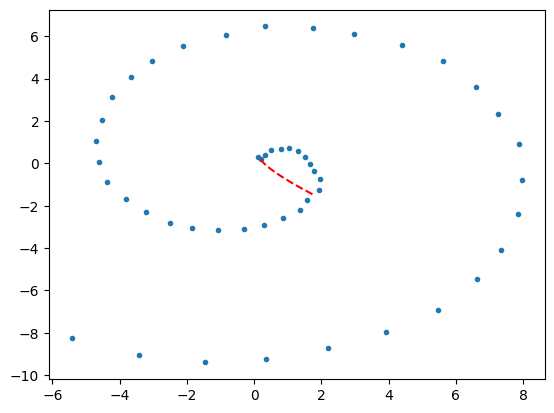

In [181]:
plt.plot(x_true.T[0], x_true.T[1], '.')
plt.plot(x_pred.T[0], x_pred.T[1], 'r--')

In [183]:
optimizer = optim.Adam(neural_ode.parameters(), lr=1e-3)
loss_list = []
x_pred_list = []
for itr in range(1, 1000):
    optimizer.zero_grad()
    x0, t, x_true = get_x0_t_x()
    
    x_pred = neural_ode(x0, t)
    loss = 0.9*torch.mean(torch.abs((x_pred - x_true)))+ 0.1*torch.mean(torch.abs(x_pred[-1] - x_true[-1]))
    loss.backward()
    optimizer.step()
    loss_ = loss.item()
    print(f"{itr}\t:loss={loss_:.4f}", end="\r")
    loss_list.append(loss_)
    if itr%5==0:
        with torch.no_grad():
            x_pred_list.append(neural_ode(x0, t))

999	:loss=0.3958

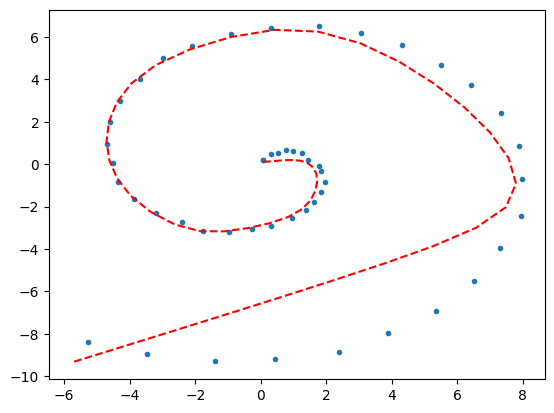

In [184]:
x_pred = x_pred_list[-1]
plt.plot(x_true.T[0], x_true.T[1], '.')
plt.plot(x_pred.T[0], x_pred.T[1], 'r--')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.linspace(-10, 10, 100)

In [12]:
s = 1./(np.exp(-x)+1)
sdot = np.exp(-x)/((1+np.exp(-x))**2)

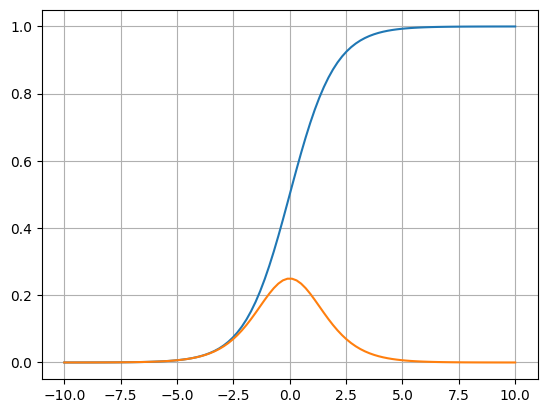

In [14]:
plt.plot(x, s)
plt.plot(x, sdot)
plt.grid()

In [19]:
print(f'{(4**10):.2e}')

1.05e+06


In [90]:
x_pred[-1] - x_true[-1]

tensor([ 4.1739, -7.6794], grad_fn=<SubBackward0>)

In [127]:
a = torch.tensor([1, 2, 3, 4 , 5 , 6])

In [150]:
r = torch.split(a, 2)
for ri in r:
    print(ri)

tensor([1, 2])
tensor([3, 4])
tensor([5, 6])
